KNN

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [102]:
df=pd.read_csv('breast-cancer.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [103]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='str')

In [104]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    str    
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             569 non-null

In [105]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [106]:
df['radius_means']=df['radius_mean'].fillna(df['radius_mean'].mean())
df['texture_means']=df['texture_mean'].fillna(df['texture_mean'].mean())

In [107]:
df.dropna(inplace=True)
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
radius_means               0
texture_means              0
dtype: int64

In [108]:
y=df["diagnosis"]
x=df[["radius_mean", "texture_mean"]]

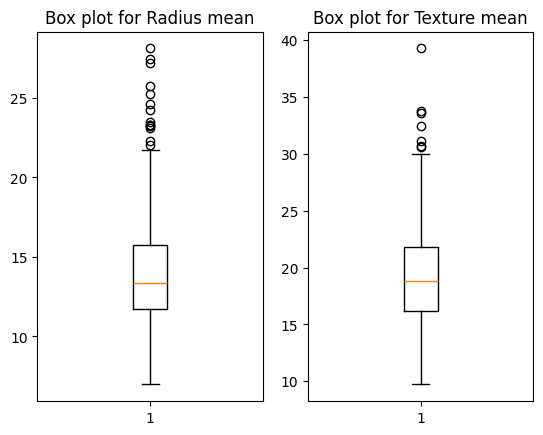

In [109]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.boxplot(df['radius_mean'])
plt.title('Box plot for Radius mean')
plt.y_label = ("radius_mean")

plt.subplot(1,2,2)
plt.boxplot(df['texture_mean'])
plt.title('Box plot for Texture mean')
plt.y_label = ("texture_mean")

plt.show()

In [110]:
Q1_texture = df['texture_mean'].quantile(0.25)
Q3_texture = df['texture_mean'].quantile(0.75)
IQR_texture = Q3_texture - Q1_texture

Q1_radius = df['radius_mean'].quantile(0.25)
Q3_radius = df['radius_mean'].quantile(0.75)
IQR_radius = Q3_radius - Q1_radius

lower_bound_texture = Q1_texture - 1.5 * IQR_texture
upper_bound_texture = Q3_texture + 1.5 * IQR_texture

lower_bound_radius = Q1_radius - 1.5 * IQR_radius
upper_bound_radius = Q3_radius + 1.5 * IQR_radius

df_cleaned = df[
    (df['texture_mean'] >= lower_bound_texture) & 
    (df['texture_mean'] <= upper_bound_texture) & 
    (df['radius_mean'] >= lower_bound_radius) & 
    (df['radius_mean'] <= upper_bound_radius)]
print("Original dataset shape:", df.shape)
print("Cleaned dataset shape:", df_cleaned.shape)

Original dataset shape: (569, 34)
Cleaned dataset shape: (548, 34)


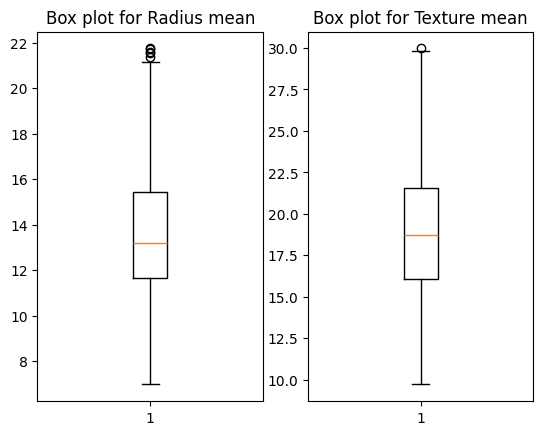

In [111]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.boxplot(df_cleaned['radius_mean'])
plt.title('Box plot for Radius mean')
plt.y_label = ("radius_mean")

plt.subplot(1,2,2)
plt.boxplot(df_cleaned['texture_mean'])
plt.title('Box plot for Texture mean')
plt.y_label = ("texture_mean")

plt.show()

In [112]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)



In [113]:
# Select features first
X = df[['radius_mean', 'texture_mean']]

# Scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [114]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

accuracies = []
for k in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracies.append(accuracy_score(y_test, knn.predict(X_test)))

best_k = accuracies.index(max(accuracies)) + 1
print("Best k:", best_k, "Accuracy:", max(accuracies))


Best k: 10 Accuracy: 0.9298245614035088


In [115]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

y_pred = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train).predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))


Confusion Matrix:
 [[66  5]
 [ 6 37]]
Accuracy: 0.9035087719298246
Precision: 0.8809523809523809
Recall: 0.8604651162790697
F1: 0.8705882352941177


<Axes: >

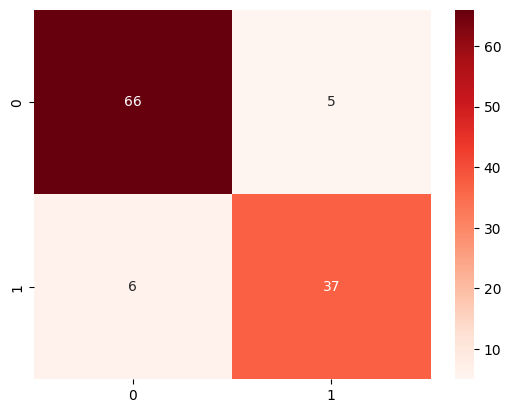

In [124]:

conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True,fmt='g',cmap="Reds")

<Axes: >

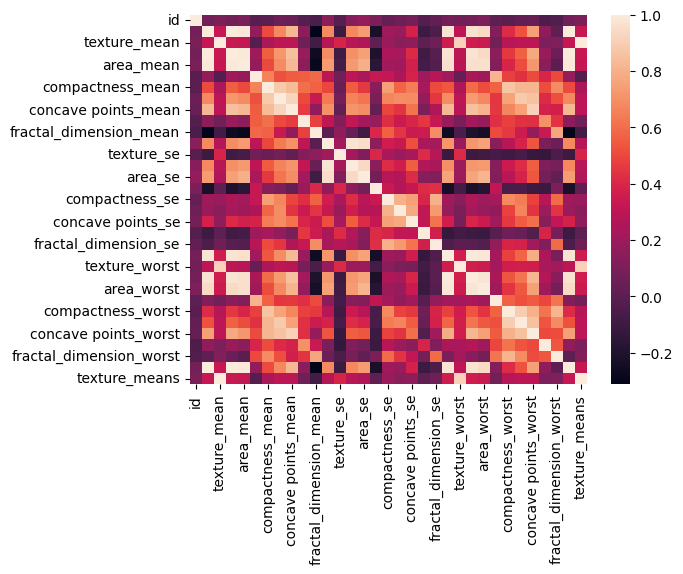

In [125]:
sns.heatmap(df.select_dtypes(exclude=['object']).corr())